<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/main/p_ads_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv('/content/cost-of-living-2018.csv')
df

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",145.43,110.87,128.76,143.47,158.75,112.26
1,NaN,"Zurich, Switzerland",141.25,66.14,105.03,149.86,135.76,142.70
2,NaN,"Geneva, Switzerland",134.83,71.70,104.38,138.98,129.74,130.96
3,NaN,"Basel, Switzerland",130.68,49.68,91.61,127.54,127.22,139.01
4,NaN,"Bern, Switzerland",128.03,43.57,87.30,132.70,119.48,112.71
...,...,...,...,...,...,...,...,...
535,NaN,"Kochi, India",24.65,6.31,15.80,26.93,13.94,77.70
536,NaN,"Coimbatore, India",24.61,5.35,15.32,25.23,15.21,53.23
537,NaN,"Alexandria, Egypt",23.78,4.34,14.40,23.19,17.66,23.75
538,NaN,"Navi Mumbai, India",23.44,6.25,15.15,24.02,14.14,111.99


Outliers using Quantile method:
   Rank                   City  Cost of Living Index  Rent Index  \
0   NaN      Hamilton, Bermuda                145.43      110.87   
1   NaN    Zurich, Switzerland                141.25       66.14   
2   NaN    Geneva, Switzerland                134.83       71.70   
3   NaN     Basel, Switzerland                130.68       49.68   
4   NaN      Bern, Switzerland                128.03       43.57   
5   NaN  Lausanne, Switzerland                127.50       52.32   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          128.76           143.47                  158.75   
1                          105.03           149.86                  135.76   
2                          104.38           138.98                  129.74   
3                           91.61           127.54                  127.22   
4                           87.30           132.70                  119.48   
5                      

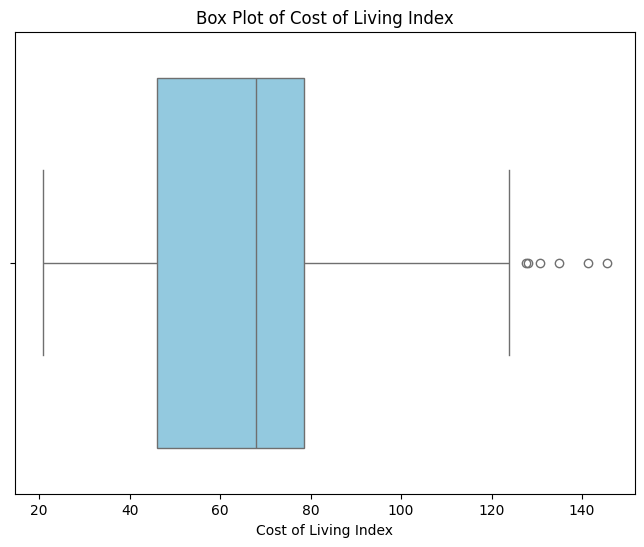

In [ ]:
import matplotlib.pyplot as plt


# Define the Cost of Living Index column
cost_of_living = df['Cost of Living Index']

# Calculate the interquartile range (IQR)
Q1 = cost_of_living.quantile(0.25)
Q3 = cost_of_living.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
quantile_outliers = df[(cost_of_living < lower_bound) | (cost_of_living > upper_bound)]
print("Outliers using Quantile method:")
print(quantile_outliers)

import seaborn as sns

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cost of Living Index'], color='skyblue')
plt.xlabel('Cost of Living Index')
plt.title('Box Plot of Cost of Living Index')
plt.show()

Outliers using DBSCAN:
Empty DataFrame
Columns: [Rank, City, Cost of Living Index, Rent Index, Cost of Living Plus Rent Index, Groceries Index, Restaurant Price Index, Local Purchasing Power Index]
Index: []


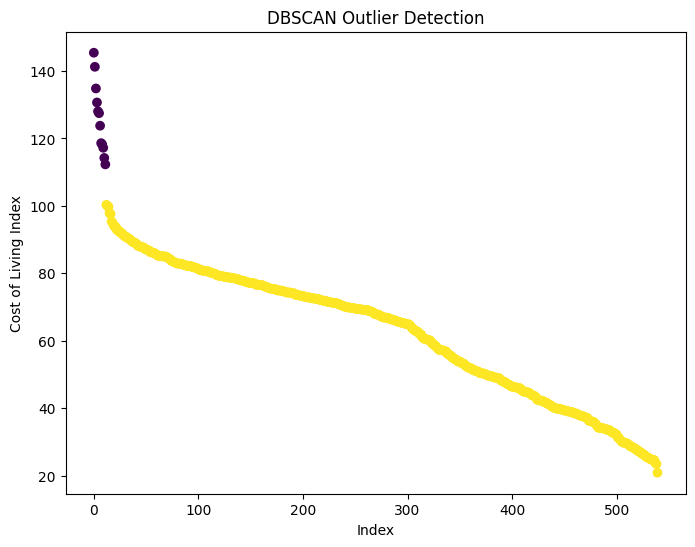

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Cost of Living Index']])

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(scaled_features)

# Extract outliers
dbscan_outliers = df[dbscan.labels_ == -1]
print("Outliers using DBSCAN:")
print(dbscan_outliers)

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Cost of Living Index'], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Cost of Living Index')
plt.title('DBSCAN Outlier Detection')
plt.show()


Outliers using k-nearest neighbors:
Empty DataFrame
Columns: [Rank, City, Cost of Living Index, Rent Index, Cost of Living Plus Rent Index, Groceries Index, Restaurant Price Index, Local Purchasing Power Index]
Index: []


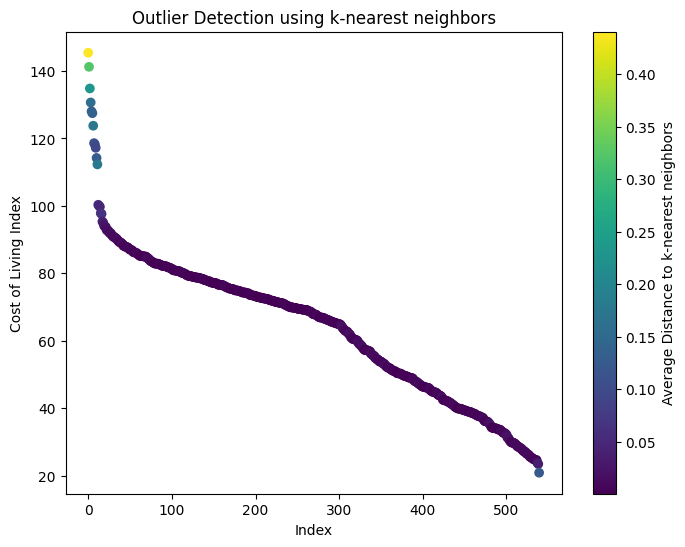

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Define the number of neighbors
k = 5  # Adjust as needed

# Fit KNN model
knn = NearestNeighbors(n_neighbors=k)
knn.fit(scaled_features)

# Calculate distances to k-nearest neighbors
distances, _ = knn.kneighbors(scaled_features)

# Calculate average distance to k-nearest neighbors
avg_distances = distances.mean(axis=1)

# Define a threshold to identify outliers
threshold = 2.5  # Adjust as needed

# Extract outliers
knn_outliers = df.iloc[avg_distances > threshold]
print("Outliers using k-nearest neighbors:")
print(knn_outliers)

import matplotlib.pyplot as plt

# Plot the data points with colors indicating average distance to k-nearest neighbors
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Cost of Living Index'], c=avg_distances, cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Cost of Living Index')
plt.title('Outlier Detection using k-nearest neighbors')
plt.colorbar(label='Average Distance to k-nearest neighbors')
plt.show()

